In [108]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('../Data/processed/data_processed.csv')
df.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Topics,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Archived,Is Template,Default Branch
0,freeCodeCamp,freeCodeCamp.org's open-source codebase and cu...,https://github.com/freeCodeCamp/freeCodeCamp,2014-12-24 17:49:19+00:00,2023-09-21 11:32:33+00:00,http://contribute.freecodecamp.org/,387451,374074,33599,248,...,"['careers', 'certification', 'community', 'cur...",True,True,True,False,True,False,False,False,main
1,free-programming-books,:books: Freely available programming books,https://github.com/EbookFoundation/free-progra...,2013-10-11 06:50:37+00:00,2023-09-21 11:09:25+00:00,https://ebookfoundation.github.io/free-program...,17087,298393,57194,46,...,"['books', 'education', 'hacktoberfest', 'list'...",True,False,True,False,True,False,False,False,main
2,awesome,😎 Awesome lists about all kinds of interesting...,https://github.com/sindresorhus/awesome,2014-07-11 13:42:37+00:00,2023-09-21 11:18:22+00:00,NaN,1441,269997,26485,61,...,"['awesome', 'awesome-list', 'lists', 'resource...",True,False,True,False,True,False,False,False,main
3,996.ICU,Repo for counting stars and contributing. Pres...,https://github.com/996icu/996.ICU,2019-03-26 07:31:14+00:00,2023-09-21 08:09:01+00:00,https://996.icu,187799,267901,21497,16712,...,[],False,False,True,False,False,False,True,False,master
4,coding-interview-university,A complete computer science study plan to beco...,https://github.com/jwasham/coding-interview-un...,2016-06-06 02:34:12+00:00,2023-09-21 10:54:48+00:00,NaN,20998,265161,69434,56,...,"['algorithm', 'algorithms', 'coding-interview'...",True,False,True,False,False,False,False,False,main


Does age of a repository affect its popularity?
Does a repository get more stars/forks if it implements multiple services (Issues, Projects, Downloads, Wiki, Pages, Discussions)?
Are git repositories more popular if they have a homepage?


### Does age of a repository affect its popularity?

Calculate age

In [3]:
df['Created At'] = pd.to_datetime(df['Created At'])

In [4]:
age = pd.Timestamp.now().date() - df['Created At'].dt.date
age = pd.to_timedelta(age,unit='d')
age = age.dt.days
age

0         3273
1         3712
2         3439
3         1720
4         2743
          ... 
215024    4935
215025    3310
215026    3415
215027    3786
215028    2638
Name: Created At, Length: 215029, dtype: int64

In [5]:
df['Age_(days)'] = age

Plotting age against Stars and Forks

[Text(0.5, 1.0, 'Age - Forks relationship'),
 Text(0, 0.5, 'Forks'),
 Text(0.5, 0, 'Age (days)')]

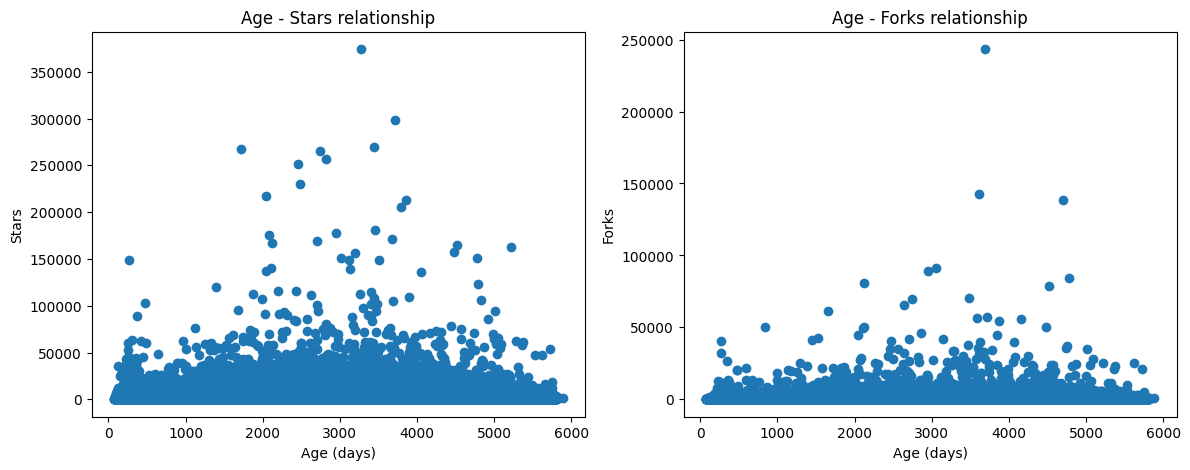

In [6]:
fig = plt.figure(figsize=(14,5))
axs = fig.subplots(1,2).flatten()

axs[0].scatter(y=df['Stars'], x=df['Age_(days)'])
axs[0].set(title='Age - Stars relationship', ylabel='Stars', xlabel='Age (days)')

axs[1].scatter(y=df['Forks'], x=df['Age_(days)'])
axs[1].set(title='Age - Forks relationship', ylabel='Forks', xlabel='Age (days)')

Correlation heatmap

In [7]:
corr_matrix = np.corrcoef(df['Age_(days)'], [df['Stars'], df['Forks']])

<Axes: >

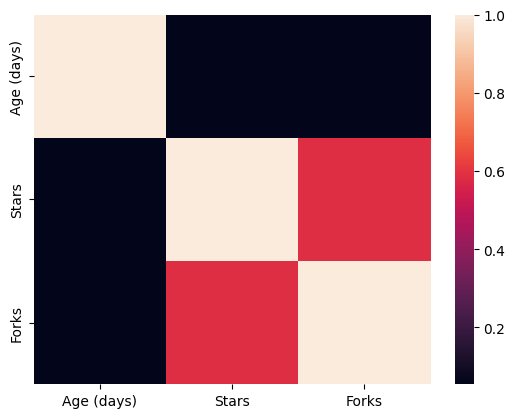

In [8]:
cols = ['Age (days)','Stars','Forks']
sns.heatmap(corr_matrix, xticklabels=cols, yticklabels=cols)

**Conclusion**
- So, there is no correlation between age of a repository and its popularity.
- This means any repository can have fair chance of being popular, despite their age.

### Does a repository get more stars/forks if it implements multiple services (Issues, Projects, Downloads, Wiki, Pages, Discussions)?
- This question will help
- To answer this question, we will calculate the number of services a repository implements. ... #TODO

In [9]:
cols = ['Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki',
       'Has Pages', 'Has Discussions']

service_count = df[cols].sum(axis=1)
service_count

0         4
1         3
2         3
3         1
4         2
         ..
215024    3
215025    4
215026    4
215027    4
215028    4
Length: 215029, dtype: int64

In [10]:
df['Service_Count'] = service_count

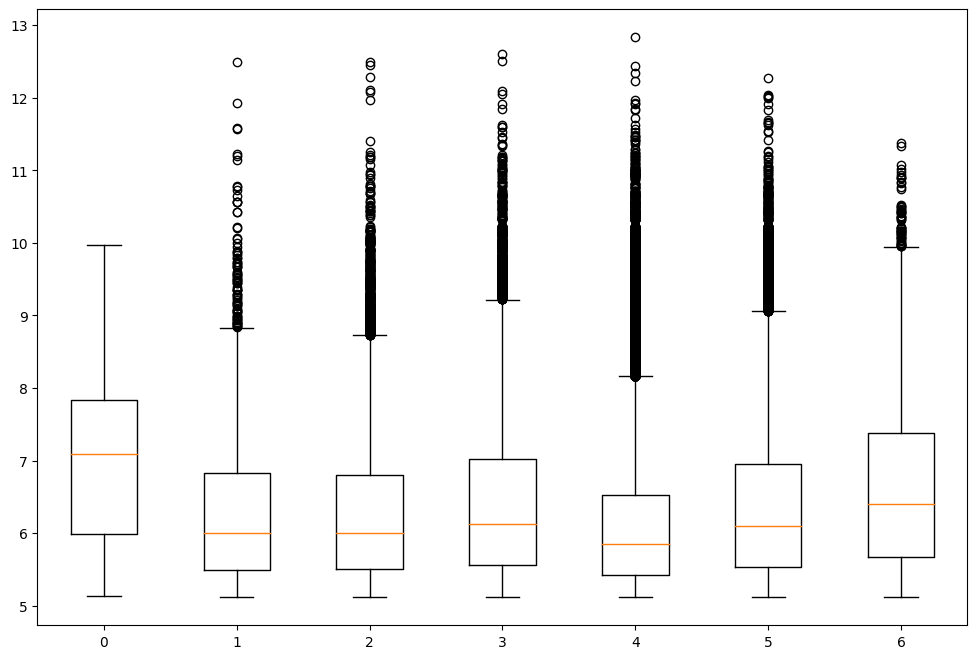

In [91]:
a = []
for i in range(7):
    a.append(np.log(df[df['Service_Count'] == i]['Stars'].to_numpy()))

plt.figure(figsize=(12,8))
#plt.boxplot(a)
plt.boxplot(a, labels=[0,1,2,3,4,5,6])
plt.show()

Spearman rank correlation coefficient

In [107]:
stats.spearmanr(df['Service_Count'], df['Stars'])

SignificanceResult(statistic=0.014473263585443418, pvalue=1.923154076037549e-11)

### Are git repositories more popular if they have a homepage?

In [109]:
df['Has_Homepage'] = ~df['Homepage'].isna()

t-test on the data

In [117]:
stats.ttest_ind(df[df['Has_Homepage'] == True]['Stars'], df[df['Has_Homepage'] == False]['Stars'], equal_var=False)

Ttest_indResult(statistic=35.92855616104715, pvalue=6.28917868649209e-281)

Plotting

{'whiskers': [<matplotlib.lines.Line2D at 0x1eae69b7590>,
 'caps': [<matplotlib.lines.Line2D at 0x1eae69cc650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eae69b6d10>,
 'medians': [<matplotlib.lines.Line2D at 0x1eae69cd790>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eae69b7e50>,
 'means': []}

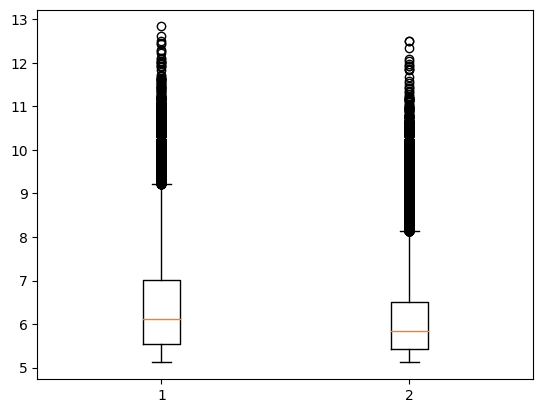

In [116]:
plt.boxplot([np.log(df[df['Has_Homepage'] == True]['Stars']), np.log(df[df['Has_Homepage'] == False]['Stars'])])
plt.show()